# Multinomial logistic regression on MNIST with

The goal of this notebook is to implement a deep neural network that classifies images of handwritten digits from the MNIST dataset (LeCun & Cortes, 2010) using a multinomial logistic regression in Tensorflow.

## Prerequisities

* tensorflow
* numpy
* matplotlib

## Getting to know the dataset
The MNIST dataset is the "Hello World" of machine learning. It consists of 70.000 hand-written, labeled digits which Tensorflow splits it into 55.000 samples for training, 5.000 samples for validation and 10.000 samples for testing.

Lets start by loading the dataset. The ```tf.keras.datasets.mnist``` package gives access to the dataset with a predetermined train / test split

In [1]:
from tensorflow.keras.datasets.mnist import load_data
(train_X, train_y),(test_X, test_y) = load_data()

To visualize the data of the dataset, matplotlib's [```imshow()```](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) function can be used. Each image is a 2D tensor with dimension $ 28^2=784 $px and uint8 values between 0 and 255 (8-bit grayscale).

(28, 28)
uint8


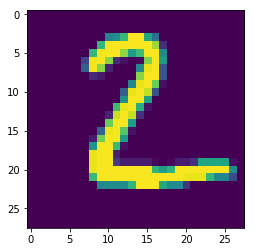

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

image = test_X[1].reshape((28, 28))
print(image.shape)
print(image.dtype)
plt.imshow(image)

The labels are integers representing the written digit

In [3]:
label = test_y[1]
print(label)

2


## Building the model

A simple model that can be used to classify MNIST images is depicted in the figure below. The model takes the *flat* input image $X$ (the 1D tensors) in its input layer, has one hidden layer with 100 neurons and a rectifier activation function, and a outputlayer with 10 neurons (one for each possible digit). The activation function of the outputlayer is a softmax-function. Therefore, each neuron of the output layer outputs the probability $p(y=j|X)$ that the current input $X$ belongs to the class $j$ represented by this neuron.


![svg image](data:image/svg+xml,%3C%21DOCTYPE%20svg%20PUBLIC%20%22-%2F%2FW3C%2F%2FDTD%20SVG%201.1%2F%2FEN%22%20%22http%3A%2F%2Fwww.w3.org%2FGraphics%2FSVG%2F1.1%2FDTD%2Fsvg11.dtd%22%3E%0D%0A%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22521px%22%20height%3D%22391px%22%20version%3D%221.1%22%3E%3Cdefs%2F%3E%3Cg%20transform%3D%22translate%280.5%2C0.5%29%22%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20223.91%2053.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%2054.67%20L%20221.61%2056.97%20L%20223.91%2053.81%20L%20222.76%2050.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28132.5%2C31.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20225.3%20170.78%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20174.14%20L%20221.71%20172.35%20L%20225.3%20170.78%20L%20226.19%20166.97%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28108.5%2C76.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20224.49%20112.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20114.36%20L%20221.36%20114.36%20L%20224.49%20112.01%20L%20224.49%20108.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28112.5%2C53.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20226.66%20289.56%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.57%20293.93%20L%20222.78%20290.04%20L%20226.66%20289.56%20L%20228.6%20286.16%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%2225%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C17.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20223.91%20113.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20114.67%20L%20221.61%20116.97%20L%20223.91%20113.81%20L%20222.76%20110.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20224.49%20172.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20174.36%20L%20221.36%20174.36%20L%20224.49%20172.01%20L%20224.49%20168.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20223.91%2055.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%2055.04%20L%20222.76%2059.64%20L%20223.91%2055.9%20L%20221.61%2052.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28157.5%2C58.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E2%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20226.05%20290.02%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.46%20294.01%20L%20222.25%20290.97%20L%20226.05%20290.02%20L%20227.56%20286.42%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%2285%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C77.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20223.91%20173.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20174.67%20L%20221.61%20176.97%20L%20223.91%20173.81%20L%20222.76%20170.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20223.91%20115.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20115.04%20L%20222.76%20119.64%20L%20223.91%20115.9%20L%20221.61%20112.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20224.49%2057.7%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%2055.36%20L%20224.49%2061.62%20L%20224.49%2057.7%20L%20221.36%2055.36%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20225.3%20290.78%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20294.14%20L%20221.71%20292.35%20L%20225.3%20290.78%20L%20226.19%20286.97%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22145%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C137.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20225.3%2058.93%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%2055.57%20L%20226.19%2062.74%20L%20225.3%2058.93%20L%20221.71%2057.37%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20224.49%20117.7%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20115.36%20L%20224.49%20121.62%20L%20224.49%20117.7%20L%20221.36%20115.36%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20223.91%20175.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20175.04%20L%20222.76%20179.64%20L%20223.91%20175.9%20L%20221.61%20172.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20224.49%20292.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20294.36%20L%20221.36%20294.36%20L%20224.49%20292.01%20L%20224.49%20288.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22205%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C197.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E4%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20225.3%20178.93%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20175.57%20L%20226.19%20182.74%20L%20225.3%20178.93%20L%20221.71%20177.37%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20223.91%20295.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20295.04%20L%20222.76%20299.64%20L%20223.91%20295.9%20L%20221.61%20292.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2878.5%2C306.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2252%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E784%2C100%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2226%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Ew1%26lt%3Bsub%26gt%3B784%2C100%26lt%3B%2Fsub%26gt%3B%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20226.05%20119.69%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.46%20115.71%20L%20227.56%20123.3%20L%20226.05%20119.69%20L%20222.25%20118.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20226.66%2060.16%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.57%2055.79%20L%20228.6%2063.55%20L%20226.66%2060.16%20L%20222.78%2059.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22325%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2811.5%2C317.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2225%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2026px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E784%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2213%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20465.92%20260.14%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.44%20264.03%20L%20462.15%20261.19%20L%20465.92%20260.14%20L%20467.34%20256.49%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20464.44%20142.13%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%20144.38%20L%20461.36%20144.55%20L%20464.44%20142.13%20L%20464.35%20138.22%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28335.5%2C81.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E1%2C2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20463.9%2083.86%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%2084.68%20L%20461.63%2087.05%20L%20463.9%2083.86%20L%20462.72%2080.13%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28361.5%2C61.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E1%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%2255%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C39.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E1%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20465.19%20260.91%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.31%20264.16%20L%20461.65%20262.57%20L%20465.19%20260.91%20L%20465.99%20257.08%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20463.9%20143.86%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20144.68%20L%20461.63%20147.05%20L%20463.9%20143.86%20L%20462.72%20140.13%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20463.9%2085.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%2085.03%20L%20462.72%2089.58%20L%20463.9%2085.85%20L%20461.63%2082.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28295.5%2C101.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E2%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22115%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C99.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E2%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20464.44%20262.13%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%20264.38%20L%20461.36%20264.55%20L%20464.44%20262.13%20L%20464.35%20258.22%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20463.9%20145.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20145.03%20L%20462.72%20149.58%20L%20463.9%20145.85%20L%20461.63%20142.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20464.44%2087.58%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%2085.34%20L%20464.35%2091.5%20L%20464.44%2087.58%20L%20461.36%2085.17%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22175%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C159.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E3%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20463.9%20265.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20265.03%20L%20462.72%20269.58%20L%20463.9%20265.85%20L%20461.63%20262.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28336.5%2C272.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2246%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E100%2C10%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2223%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Ew2%26lt%3Bsub%26gt%3B100%2C10%26lt%3B%2Fsub%26gt%3B%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20465.19%20148.8%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.31%20145.55%20L%20465.99%20152.63%20L%20465.19%20148.8%20L%20461.65%20147.14%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20465.92%2089.58%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.44%2085.69%20L%20467.34%2093.23%20L%20465.92%2089.58%20L%20462.15%2088.53%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28316.5%2C229.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2240%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E100%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2220%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22295%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28242.5%2C279.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2223%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2024px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E100%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2212%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%2819.5%2C255.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%28249.5%2C225.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%2285%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28488.5%2C69.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E1%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%22145%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28488.5%2C129.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E2%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%22265%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28485.5%2C249.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2217%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2018px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E10%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%229%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%28489.5%2C195.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20224.57%20297.84%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.2%20295.38%20L%20224.66%20301.75%20L%20224.57%20297.84%20L%20221.38%20295.57%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28166.5%2C318.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2230%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb1%3Csub%3E100%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20227.27%20180.52%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.68%20175.85%20L%20229.58%20183.68%20L%20227.27%20180.52%20L%20223.36%20180.47%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28166.5%2C274.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2219%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb1%3Csub%3E3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2210%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20227.94%20120.81%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.79%20115.9%20L%20230.59%20123.69%20L%20227.94%20120.81%20L%20224.04%20121.21%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20228.37%2060.96%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.87%2055.93%20L%20231.22%2063.64%20L%20228.37%2060.96%20L%20224.51%2061.63%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%22145%22%20cy%3D%22365%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23dae8fc%22%20stroke%3D%22%236c8ebf%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28137.5%2C358.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2213%22%20height%3D%2212%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2014px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eb1%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Eb1%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20467.76%2090.74%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.76%2085.89%20L%20470.33%2093.7%20L%20467.76%2090.74%20L%20463.86%2091.03%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20467.17%20150.46%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.66%20145.84%20L%20469.42%20153.66%20L%20467.17%20150.46%20L%20463.26%20150.34%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28436.5%2C184.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2219%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb2%3Csub%3E2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2210%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20465.01%20268.56%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.28%20265.51%20L%20465.62%20272.43%20L%20465.01%20268.56%20L%20461.55%20266.73%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28406.5%2C295.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2222%22%20height%3D%2213%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2011px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb2%3Csub%3E10%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2211px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22365%22%20cy%3D%22365%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23dae8fc%22%20stroke%3D%22%236c8ebf%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28357.5%2C358.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2213%22%20height%3D%2212%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2014px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eb2%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Eb2%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20245%20314%20L%20265%20314%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20255%20319%20L%20255%20295%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20245%20314%20L%20255%20314%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20255%20314%20L%20270%20299%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20194%20L%20264%20194%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20199%20L%20254%20175%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20194%20L%20254%20194%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20194%20L%20269%20179%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20134%20L%20264%20134%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20139%20L%20254%20115%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20134%20L%20254%20134%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20134%20L%20269%20119%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%2074%20L%20264%2074%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%2079%20L%20254%2055%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%2074%20L%20254%2074%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%2074%20L%20269%2059%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%20159%20L%20505%20159%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20169%20L%20495%20145%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20166%20L%20487%20165.5%20Q%20490%20165%20495%20158.5%20L%20497.5%20155.25%20Q%20500%20152%20504%20151.5%20L%20508%20151%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%2099%20L%20505%2099%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20109%20L%20495%2085%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20106%20L%20487%20105.5%20Q%20490%20105%20495%2098.5%20L%20497.5%2095.25%20Q%20500%2092%20504%2091.5%20L%20508%2091%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%20279%20L%20505%20279%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20289%20L%20495%20265%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20286%20L%20487%20285.5%20Q%20490%20285%20495%20278.5%20L%20497.5%20275.25%20Q%20500%20272%20504%20271.5%20L%20508%20271%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3C%2Fg%3E%3C%2Fsvg%3E)


This is an example of a basic multinomial logistic regression using a neural network.

### Building the actual Network

A Tensorflow1 graph is usually build from input to output. To be able to feed data into the graph when running the session, [```placeholder```](https://www.tensorflow.org/api_docs/python/tf/placeholder)s are used. A placeholder needs to have a data-type and a shape. 

For the model we need 2 placeholders:
* ```X``` is used to feed the input data. It has a shape of (?, 28, 28) and the datatype ```tf.float32```
* ```y_target``` is used to feed the label. It therefore has a shape of (?, ) and ```tf.int64``` as datatype

We remeber that our input data are 2-dimensional images with brightness values represented as integers in the interval $\left[ 0, 255\right]$. Thus we need to flatten the images and normalize the input before passing it to subsequent layers. 

#### Steps:

* Create the two placeholders to input data into the model
* Create operations to preprocess the input data (flatten to 1-dimensional tensors and normalize to the interval $\left[0, 1\right]$. 


In [8]:
tf.reset_default_graph() 

In [9]:
with tf.variable_scope("mlp") as vs:
    X_square = tf.placeholder(tf.float32, shape=[None,28,28], name='X_square')
    y_target = tf.placeholder(tf.int64, shape=[None,], name='y_target')

In [10]:
print(X_square.shape)

#in one step, flatten and normalising 
X = tf.reshape((X_square/tf.reduce_max(X_square)), [-1, X_square.shape[1] * X_square.shape[2]])

print(X.shape)

(?, 28, 28)
(?, 784)


Now we can build the first layer of the network. To calculate the output of this layer, multiply the input vector $X$ with the weight matrix $w1$ and add the bias vector $b1$. After this, apply the ReLU activation function.

$$ h(X) = relu(X * w1 + b1) $$

First, however, we create the weight and bias tensors. The hidden layer has 100 neurons.

* ```w1``` is a matrix with shape (784, 100) and is initialized with normal-distributed random numbers
* ```b1``` is a vector with shape (100) and is initialized with ```0```

We use the [```tf.Variable```](https://www.tensorflow.org/api_docs/python/tf/Variable) class to create a tensor of variable values ans pass an initializer that creates initial values of the correct shape.

After creating the variables, we compute the output of the hidden layer using the [```tf.matmul```](https://www.tensorflow.org/api_docs/python/tf/matmul), [```tf.add```](https://www.tensorflow.org/api_docs/python/tf/add) and [```tf.nn.relu```](https://www.tensorflow.org/api_docs/python/tf/nn/relu) functions.

#### Step:

* We create the first network layer that takes the input placeholder as an input and has the specified shape and activation function


In [11]:
w1 = tf.get_variable(initializer=tf.initializers.random_normal(), dtype=tf.float32, name="w1", shape=(784, 100))
b1 = tf.get_variable(initializer=tf.zeros_initializer(), dtype=tf.float32, name="b1", shape=(100))
layer1 = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))

Next is the computation of the output layer. The computation is basically equivalent to the previous layer, however the weight-matrix w2 connects the 100-neuron hidden layer with the 10-neuron output layer. Therefore:


* ```w2``` is a matrix with shape (100, 10) and is initialized with normal-distributed random numbers
* ```b2``` is a vector with shape (10) and is initialized with 0

$$ y_{pred}(h(X)) = softmax(h(x) * w2 + b2) $$

#### Step:

* Create a second layer in the network that takes the previous output as input and has the specified size


In [12]:
w2 = tf.get_variable(initializer=tf.initializers.random_normal, dtype=tf.float32, name="w2", shape=(100, 10))
b2 = tf.get_variable(initializer=tf.zeros_initializer, dtype=tf.float32, name="b2", shape=(10))

logits = tf.add(tf.matmul(layer1, w2), b2)

It is now possible to calculate the loss of the network using [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy). The output of the network predicts the probability of class-affiliation thus the label needs to represents the real probability of class-affiliation (1.0 only for the correct number, 0.0 otherwise). This is commonly referred to as one-hot encoding of the labels (only a single position in the label-vector is 1, all other positions are 0). Since our labels are fed as integers, we need to convert them to a one-hot encoding to represent a valid probability distribution before we can use them in the cross-entropy calculation. This can easily be done one-the-fly using the function [```one_hot```](https://www.tensorflow.org/api_docs/python/tf/one_hot).

Tensorflow1 has the function [```softmax_cross_entropy_with_logits_v2```](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2) that makes it easy to calculate this loss. To reduce the list of cross-entropies, use [```tf.reduce_mean```](https://www.tensorflow.org/api_docs/python/tf/reduce_mean) to calculate the average loss.

#### Steps:

* create operations in the compute graph to calculate the cross-entropy and mean-cross-entropy

As the name implies, the function expects [logits (log-odds)](https://en.wikipedia.org/wiki/Logit) as input. Log-odds are the unscaled output of the network before the softmax activation function. Therefore, we make sure to **not** call [```tf.nn.softmax```](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) on our output calculation.

In [13]:
#one hot encode labels
y_target_onehot = tf.one_hot(y_target, 10)
print(y_target_onehot.shape)
print(logits.shape)

(?, 10)
(?, 10)


In [14]:
#define loss
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_target_onehot))


Since we now can compute the loss of the network, we can tune the network parameters (variables), so that this loss is minimized. This is typically done using [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) and [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

To compute the gradients we need to know the derivatives of the loss $L(X)$ with respect to the model parameters (weights, biases) $\theta$ and then perform a training step in the direction of the negative gradient. The step size is defined by an additional parameter $ \eta $.

$$ \Delta w = -\eta \frac{\delta L(X)}{\delta \theta} $$

Luckily Tensorflow already offers [many optimizers](https://www.tensorflow.org/api_guides/python/train#Optimizers) that perform these steps automatically. For the network, we use a [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) that only expects the learning rate $\eta$ as a parameter. All [```Optimizer```](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer)s have a minimize function that expects the value to minimize and returns an operation that automatically performs the optimization step and adjusts the variables accordingly.

#### Step:

* Create the optimize operation using a [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) that minimizes the loss of the network


The [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) expects either a python float or a 0-dimensional [```Tensor```](https://www.tensorflow.org/programmers_guide/tensors) (scalar) for the ```learning_rate``` parameter. Due to the asynchronous nature of Tensorflow1 it is not possible to pass a python variable now and expect to adjust it later during training since this would not alter the computation graph. If we want to have a variable training rate you need to define a new [```tf.placeholder```](https://www.tensorflow.org/api_docs/python/tf/placeholder) of type ```tf.float32``` and shape ```()``` (a scalar) and pass it as an argument to the optimizer. This way it is possible to feed in values during training and thus adjust the training rate dynamically. 

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_loss)

We could now run the optimization operation and feed the training data to the network. However there still is no way of evaluating any result from the network apart from manually checking the output. Since the network is a multinomial classifier, a commonly used metric is the **accuracy** which is defined by the number of correct predicitions divided by the total number of predictions.

$$ acc(X,y) = \frac { 1 }{ N } \sum _{ i=1 }^{ N }{ \begin{cases} 1\ if\ argmax({y_{pred}}_{ i })={ y_{real} }_{ i } \\ 0\ otherwise \end{cases} } $$

where:
* $X$ is a set of training elements and $y$ is the set of labels
* $G(X)$ is the classifier that outputs the log-odds given input $X$ 

#### Step:

* Create a new operation in the graph that calculates the accuracy of the network 

In [16]:
correct_prediction_t = tf.equal(tf.cast(tf.argmax(logits, 1), tf.float32), y_target_onehot)
accuracy_t = tf.reduce_mean(tf.cast(correct_prediction_t, tf.float32))

## Training the Model

Now that we have added all operations that you need to train and evaluate the model to the Tensorflow compute graph, we can train the model in multiple steps using mini-batches of the training set. We can execute operations in [```Session```](https://www.tensorflow.org/api_docs/python/tf/Session)s. Therefore we first need to create a new session in which an instance of the graph is automatically created.

In the new Session, the weight and bias variables defined earlier are not yet initialized, they only have initialization operations defined. To initialize the variables with the random or constant values, we need to run those operations. Tensorflow has the function [```tf.global_variables_initializer()```](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer) that collects all variable initializers and combines them into a single operation. This operation can then be run in the session.

#### Step:

* Create a new Session and initialize all variables

Note: Mini-batching isn't absolutley necessary since the MNIST dataset fits easily into main-memory and we're training un the CPU. 

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

We can now run our optimization operation you declared before. Since this operation depends on the ```placeholder```s we defined for the model to feed the input $X$ and labels $y_{real}$ we need to pass those variables using the ```feed_dict``` parameter of the [```run()```](https://www.tensorflow.org/api_docs/python/tf/Session#run) method.

For effective training we feed the model with mini-batches, thus we need to split the data into smaller chunks. Tensorflow offers the [```tf.data.Dataset```](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API for effective and easy handling of such tasks. Another possibility is to create the batches using slices of the dataset-arrays.

If you used a ```placeholder``` for the ```learning_rate``` parameter of the optimizer, you also need to add it.

#### Steps:

* Train the model in 10.000 steps using mini-batches with 100 random samples and a learning rate of 0.5
* To see that the model is training successfully, we run the accuracy operation every 1.000 steps and feed the test subset of the MNIST dataset 

In [18]:
import math 
batchSize = 100

steps= 10000
dataSize = train_X.shape[0]
#calculate number of epochs with given number of steps and batch size
epochs= math.ceil(steps /(dataSize/batchSize))
#epochs = 34
print(epochs)

17


In [19]:
#print shape of data
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
#create datasets and randomise
trainDataset = tf.data.Dataset.from_tensor_slices((train_X,train_y)).shuffle(train_X.shape[0], seed=0) #seed defined to make results reproducible
testDataset = tf.data.Dataset.from_tensor_slices((test_X,test_y)).shuffle(test_X.shape[0], seed=0)

In [21]:
#create batches
trainDataset_batched = trainDataset.batch(batchSize).repeat(-1)
testDataset_batched = testDataset.batch(batchSize).repeat(-1)

In [22]:
#define interators for batch training
trainIterator = trainDataset_batched.make_initializable_iterator()
testIterator = testDataset_batched.make_initializable_iterator()

In [23]:
nextTrainIterator = trainIterator.get_next()
nextTestIterator = testIterator.get_next()

Helper function to iterate over training or test data.

In [24]:
def getNext(trainInput = True):
    if trainInput:
        return nextTrainIterator
    else:
        return nextTestIterator

In [25]:
sess.run(trainIterator.initializer)
sess.run(testIterator.initializer)

In [26]:
trainingloss_mlp1 = []
testloss_mlp1 = []
import numpy
stepCounter =0
for epoch in range(epochs):
    for step in range(int(dataSize/batchSize)):
        stepCounter += 1
        trainInput = sess.run(getNext(True))
        features = trainInput[0]
        labels = trainInput[1]
        opt, _train_loss = sess.run([optimizer, cross_entropy_loss], feed_dict={X_square: features, y_target: labels})
        #if stepCounter % 1000==0:
    # Get test data, split into features and labels
    testInput = sess.run(getNext(False))
    testFeatures = testInput[0]
    testLabels = testInput[1]

    # Get output for test data
    _logits = numpy.array(sess.run([logits], feed_dict={X_square: testFeatures}))
    oneHotLabels = tf.one_hot(testLabels, 10)
    _test_loss = sess.run(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=_logits, labels=oneHotLabels)))

    # Append train and test loss for visualization
    trainingloss_mlp1.append(_train_loss)
    testloss_mlp1.append(_test_loss)

    # Log current training status
    print("step:", stepCounter)
    print("epoch: ", epoch)
    print("trainloss: ",_train_loss)
    print("testloss: ",_test_loss)
    print("-----------------------------------")

step: 600
epoch:  0
trainloss:  0.48459256
testloss:  0.5758379
-----------------------------------
step: 1200
epoch:  1
trainloss:  0.5939093
testloss:  0.4877229
-----------------------------------
step: 1800
epoch:  2
trainloss:  0.6898463
testloss:  0.3527746
-----------------------------------
step: 2400
epoch:  3
trainloss:  0.34685817
testloss:  0.3600638
-----------------------------------
step: 3000
epoch:  4
trainloss:  0.18545258
testloss:  0.29031703
-----------------------------------
step: 3600
epoch:  5
trainloss:  0.34767997
testloss:  0.23947513
-----------------------------------
step: 4200
epoch:  6
trainloss:  0.3171874
testloss:  0.2124135
-----------------------------------
step: 4800
epoch:  7
trainloss:  0.15395854
testloss:  0.21098144
-----------------------------------
step: 5400
epoch:  8
trainloss:  0.21506464
testloss:  0.2102613
-----------------------------------
step: 6000
epoch:  9
trainloss:  0.07323487
testloss:  0.43266225
--------------------------

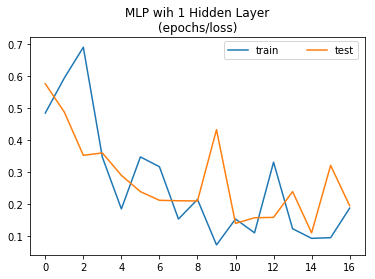

In [27]:
import matplotlib.pyplot as plt
plt.subplot(111)
plt.title('MLP wih 1 Hidden Layer\n(epochs/loss)')
plt.plot(trainingloss_mlp1, label="train")
plt.plot(testloss_mlp1, label="test")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(.58, .9 , .4, .5), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# Result

The MLP delivers the best result on the test data after 9000 steps in epoch 14 in the training phase (loss: 0.110).
It is possible that an additional hidden layer increases the accuracy, because the models can adapt better. This will be tested in the following.

Close the session after training to free all resources.

In [28]:
sess.close()

# MLP with 2 Hidden Layern

In [30]:
from tensorflow.keras.datasets.mnist import load_data
(train_X, train_y),(test_X, test_y) = load_data()

tf.reset_default_graph() 

with tf.variable_scope("mlp2") as vs:
    X_square = tf.placeholder(tf.float32, shape=[None,28,28], name='X_square')
    y_target = tf.placeholder(tf.int64, shape=[None,], name='y_target')

#flatten
X = tf.reshape(X_square, [-1, X_square.shape[1] * X_square.shape[2]])
#normalize between 0 and 255
X = X/255

n_hidden1 = 256
n_hidden2 = 512
n_input = 784
n_output = 10


w1 = tf.get_variable(initializer=tf.initializers.random_normal(), dtype=tf.float32, name="w1", shape=(n_input, n_hidden1))
b1 = tf.get_variable(initializer=tf.zeros_initializer(), dtype=tf.float32, name="b1", shape=(n_hidden1))
layer1 = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))

w2 = tf.get_variable(initializer=tf.initializers.random_normal, dtype=tf.float32, name="w2", shape=(n_hidden1, n_hidden2))
b2 = tf.get_variable(initializer=tf.zeros_initializer, dtype=tf.float32, name="b2", shape=(n_hidden2))
layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, w2), b2))

w3 = tf.get_variable(initializer=tf.initializers.random_normal, dtype=tf.float32, name="w3", shape=(n_hidden2, n_output))
b3 = tf.get_variable(initializer=tf.zeros_initializer, dtype=tf.float32, name="b3", shape=(n_output))
logits = tf.add(tf.matmul(layer2, w3), b3)

#one hot encode labels
y_target_onehot = tf.one_hot(y_target, 10)

#define loss
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_target_onehot))

#define optimizer
#learning rate changed to 0.005 to reach better results
optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy_loss)

correct_prediction_t = tf.equal(tf.cast(tf.argmax(logits, 1), tf.float32), y_target_onehot)
accuracy_t = tf.reduce_mean(tf.cast(correct_prediction_t, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

import math 
batchSize = 100

steps= 10000
dataSize = train_X.shape[0]
epochs= math.ceil(steps /(dataSize/batchSize))
epochs = 30

trainDataset = tf.data.Dataset.from_tensor_slices((train_X,train_y)).shuffle(train_X.shape[0])
testDataset = tf.data.Dataset.from_tensor_slices((test_X,test_y)).shuffle(test_X.shape[0])

trainDataset_batched = trainDataset.batch(batchSize).repeat(-1)
testDataset_batched = testDataset.batch(batchSize).repeat(-1)

trainIterator = trainDataset_batched.make_initializable_iterator()
testIterator = testDataset_batched.make_initializable_iterator()

nextTrainIterator = trainIterator.get_next()
nextTestIterator = testIterator.get_next()

def getNext(trainInput = True):
    if trainInput:
        return nextTrainIterator
    else:
        return nextTestIterator

sess.run(trainIterator.initializer)
sess.run(testIterator.initializer)

import numpy
stepCounter = 0
trainingloss_mlp2 = []
testloss_mlp2 = []
trainingloss_mlp2_epoch16 = []
testloss_mlp2_epoch16 = []
for epoch in range(epochs):
    for step in range(int(dataSize/batchSize)):
        stepCounter += 1
        trainInput = sess.run(getNext(True))
        
        features = trainInput[0]
        labels = trainInput[1]
        opt, _train_loss = sess.run([optimizer, cross_entropy_loss], feed_dict={X_square: features, y_target: labels})
        
        # check every step in epoch 16 (best test loss)
        if epoch == 16:
            # Get test data, split into features and labels
            testInput = sess.run(getNext(False))
            testFeatures = testInput[0]
            testLabels = testInput[1]

            # Get output for test data
            _logits = numpy.array(sess.run([logits], feed_dict={X_square: testFeatures}))
            oneHotLabels = tf.one_hot(testLabels, 10)
            _test_loss = sess.run(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=_logits, labels=oneHotLabels)))

            # Append train and test loss for visualization
            trainingloss_mlp2_epoch16.append(_train_loss)
            testloss_mlp2_epoch16.append(_test_loss)
            
            # Log current training status
            print("step:", stepCounter)
            print("epoch: ", epoch)
            print("trainloss: ",_train_loss)
            print("testloss: ",_test_loss)
            print("-----------------------------------")
    # Test every epoch
    # Get test data, split into features and labels
    testInput = sess.run(getNext(False))
    testFeatures = testInput[0]
    testLabels = testInput[1]

    # Get output for test data
    _logits = numpy.array(sess.run([logits], feed_dict={X_square: testFeatures}))
    oneHotLabels = tf.one_hot(testLabels, 10)
    _test_loss = sess.run(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=_logits, labels=oneHotLabels)))

    # Append train and test loss for visualization
    trainingloss_mlp2.append(_train_loss)
    testloss_mlp2.append(_test_loss)

    # Log current training status
    print("step:", stepCounter)
    print("epoch: ", epoch)
    print("trainloss: ",_train_loss)
    print("testloss: ",_test_loss)
    print("-----------------------------------")
sess.close()

step: 600
epoch:  0
trainloss:  86.09034
testloss:  16.959066
-----------------------------------
step: 1200
epoch:  1
trainloss:  9.978885
testloss:  8.9174185
-----------------------------------
step: 1800
epoch:  2
trainloss:  14.632305
testloss:  1.8527548
-----------------------------------
step: 2400
epoch:  3
trainloss:  11.952799
testloss:  15.738239
-----------------------------------
step: 3000
epoch:  4
trainloss:  14.372231
testloss:  55.521362
-----------------------------------
step: 3600
epoch:  5
trainloss:  1.6099443
testloss:  21.599285
-----------------------------------
step: 4200
epoch:  6
trainloss:  5.5714626
testloss:  20.953218
-----------------------------------
step: 4800
epoch:  7
trainloss:  0.69497406
testloss:  10.193191
-----------------------------------
step: 5400
epoch:  8
trainloss:  1.3348739
testloss:  13.553759
-----------------------------------
step: 6000
epoch:  9
trainloss:  3.0535467
testloss:  26.665777
-----------------------------------
st

step: 9668
epoch:  16
trainloss:  4.4344873e-07
testloss:  4.6418977
-----------------------------------
step: 9669
epoch:  16
trainloss:  1.35211085e-05
testloss:  48.080303
-----------------------------------
step: 9670
epoch:  16
trainloss:  0.0
testloss:  2.6464148
-----------------------------------
step: 9671
epoch:  16
trainloss:  0.0
testloss:  24.963047
-----------------------------------
step: 9672
epoch:  16
trainloss:  0.08248949
testloss:  8.656203
-----------------------------------
step: 9673
epoch:  16
trainloss:  4.392824
testloss:  34.03852
-----------------------------------
step: 9674
epoch:  16
trainloss:  0.28873053
testloss:  19.492239
-----------------------------------
step: 9675
epoch:  16
trainloss:  0.4226239
testloss:  9.923288
-----------------------------------
step: 9676
epoch:  16
trainloss:  0.0
testloss:  22.762999
-----------------------------------
step: 9677
epoch:  16
trainloss:  0.012084577
testloss:  29.789894
-----------------------------------

step: 9751
epoch:  16
trainloss:  0.0
testloss:  7.469497
-----------------------------------
step: 9752
epoch:  16
trainloss:  0.5506195
testloss:  6.236814
-----------------------------------
step: 9753
epoch:  16
trainloss:  0.056433488
testloss:  6.091195
-----------------------------------
step: 9754
epoch:  16
trainloss:  0.87121946
testloss:  22.106394
-----------------------------------
step: 9755
epoch:  16
trainloss:  0.028543616
testloss:  13.16118
-----------------------------------
step: 9756
epoch:  16
trainloss:  0.109362304
testloss:  12.131878
-----------------------------------
step: 9757
epoch:  16
trainloss:  0.85413176
testloss:  2.0510569
-----------------------------------
step: 9758
epoch:  16
trainloss:  0.3597088
testloss:  27.364016
-----------------------------------
step: 9759
epoch:  16
trainloss:  0.0
testloss:  16.505436
-----------------------------------
step: 9760
epoch:  16
trainloss:  0.0
testloss:  20.29532
-----------------------------------
step:

step: 9833
epoch:  16
trainloss:  3.3885458e-06
testloss:  12.406002
-----------------------------------
step: 9834
epoch:  16
trainloss:  3.584153e-05
testloss:  0.0
-----------------------------------
step: 9835
epoch:  16
trainloss:  2.8105837e-06
testloss:  23.551163
-----------------------------------
step: 9836
epoch:  16
trainloss:  0.0
testloss:  21.541086
-----------------------------------
step: 9837
epoch:  16
trainloss:  0.90351045
testloss:  7.418341
-----------------------------------
step: 9838
epoch:  16
trainloss:  4.7683706e-09
testloss:  22.968077
-----------------------------------
step: 9839
epoch:  16
trainloss:  0.09397147
testloss:  8.583379
-----------------------------------
step: 9840
epoch:  16
trainloss:  0.77326643
testloss:  14.080707
-----------------------------------
step: 9841
epoch:  16
trainloss:  0.7523029
testloss:  25.692476
-----------------------------------
step: 9842
epoch:  16
trainloss:  0.6295563
testloss:  36.606003
----------------------

step: 9916
epoch:  16
trainloss:  0.0
testloss:  18.644016
-----------------------------------
step: 9917
epoch:  16
trainloss:  0.090880334
testloss:  8.164219
-----------------------------------
step: 9918
epoch:  16
trainloss:  0.0
testloss:  3.891451
-----------------------------------
step: 9919
epoch:  16
trainloss:  0.0
testloss:  25.29315
-----------------------------------
step: 9920
epoch:  16
trainloss:  0.0
testloss:  7.1526628
-----------------------------------
step: 9921
epoch:  16
trainloss:  0.0
testloss:  18.41265
-----------------------------------
step: 9922
epoch:  16
trainloss:  0.308403
testloss:  15.170754
-----------------------------------
step: 9923
epoch:  16
trainloss:  0.0500429
testloss:  12.777932
-----------------------------------
step: 9924
epoch:  16
trainloss:  6.7049084
testloss:  22.07776
-----------------------------------
step: 9925
epoch:  16
trainloss:  1.0880852
testloss:  7.0715876
-----------------------------------
step: 9926
epoch:  16
tr

step: 9999
epoch:  16
trainloss:  0.0
testloss:  26.037542
-----------------------------------
step: 10000
epoch:  16
trainloss:  0.72753024
testloss:  15.501654
-----------------------------------
step: 10001
epoch:  16
trainloss:  0.0
testloss:  12.128382
-----------------------------------
step: 10002
epoch:  16
trainloss:  0.0
testloss:  5.6836324
-----------------------------------
step: 10003
epoch:  16
trainloss:  1.7491815
testloss:  21.872242
-----------------------------------
step: 10004
epoch:  16
trainloss:  0.0
testloss:  15.0750475
-----------------------------------
step: 10005
epoch:  16
trainloss:  0.0
testloss:  7.6507277
-----------------------------------
step: 10006
epoch:  16
trainloss:  0.0
testloss:  6.958361
-----------------------------------
step: 10007
epoch:  16
trainloss:  0.029124424
testloss:  17.422121
-----------------------------------
step: 10008
epoch:  16
trainloss:  0.35137
testloss:  11.503802
-----------------------------------
step: 10009
epoc

step: 10081
epoch:  16
trainloss:  8.537343e-05
testloss:  7.512991
-----------------------------------
step: 10082
epoch:  16
trainloss:  2.6416771
testloss:  14.201747
-----------------------------------
step: 10083
epoch:  16
trainloss:  1.5502876
testloss:  13.361294
-----------------------------------
step: 10084
epoch:  16
trainloss:  0.51451445
testloss:  14.867373
-----------------------------------
step: 10085
epoch:  16
trainloss:  0.68165565
testloss:  9.560443
-----------------------------------
step: 10086
epoch:  16
trainloss:  1.2164283
testloss:  14.875637
-----------------------------------
step: 10087
epoch:  16
trainloss:  0.0
testloss:  20.79025
-----------------------------------
step: 10088
epoch:  16
trainloss:  1.0939959
testloss:  15.644022
-----------------------------------
step: 10089
epoch:  16
trainloss:  0.5028877
testloss:  19.376799
-----------------------------------
step: 10090
epoch:  16
trainloss:  1.278073
testloss:  8.780066
----------------------

step: 10163
epoch:  16
trainloss:  0.81462127
testloss:  11.162715
-----------------------------------
step: 10164
epoch:  16
trainloss:  4.8118512e-05
testloss:  0.19725403
-----------------------------------
step: 10165
epoch:  16
trainloss:  2.199912
testloss:  10.994337
-----------------------------------
step: 10166
epoch:  16
trainloss:  2.798508
testloss:  24.725117
-----------------------------------
step: 10167
epoch:  16
trainloss:  0.98360854
testloss:  3.780221
-----------------------------------
step: 10168
epoch:  16
trainloss:  1.6138898
testloss:  10.838733
-----------------------------------
step: 10169
epoch:  16
trainloss:  1.0879104
testloss:  5.7719703
-----------------------------------
step: 10170
epoch:  16
trainloss:  0.83888763
testloss:  10.879285
-----------------------------------
step: 10171
epoch:  16
trainloss:  0.21845125
testloss:  6.364845
-----------------------------------
step: 10172
epoch:  16
trainloss:  0.25050265
testloss:  23.011559
----------

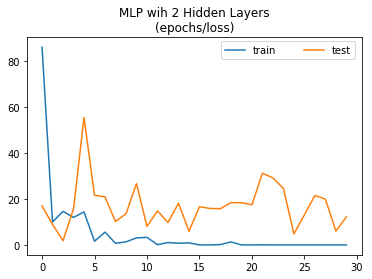

In [31]:
import matplotlib.pyplot as plt
plt.subplot(111)
plt.title('MLP wih 2 Hidden Layers\n(epochs/loss)')
plt.plot(trainingloss_mlp2, label="train")
plt.plot(testloss_mlp2, label="test")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(.58, .9 , .4, .5), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

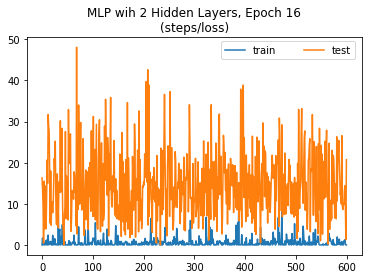

In [32]:
plt.subplot(111)
plt.title('MLP wih 2 Hidden Layers, Epoch 16\n(steps/loss)')
plt.plot(trainingloss_mlp2_epoch16, label="train")
plt.plot(testloss_mlp2_epoch16, label="test")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(.58, .9 , .4, .5), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

The error starts at higher values than in the previous model. Probably because there is a much higher number of learnable parameters.
In addition, a change in the learning rate was necessary to achieve convergence.
When considering the error in the individual epochs, we initially get worse results with the additional layer. Therefore, in the best epoch, in this case 16, a validation is performed on the test data after each batch.
Thus, compared to the model with only one layer, an error of 0 could be achieved on both the trainigs and the test data in some steps (e.g. step 9644 in epoch 16).

The assumption suggests itself that a CNN achieves very good results, since also spatial connections are considered, which plays a role with the character recognition quite.

LeCun, Y., & Cortes, C. (2010). The MNIST database of handwritten digits. Retrieved from http://yann.lecun.com/exdb/mnist